<a href="https://colab.research.google.com/github/christianadriano/PCA_AquacultureSystem/blob/master/PCA_KMeans_Environment_Piscicultura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #tables for data wrangling
import numpy as np #basic statistical methods 
import io #for uploading data

#Manual option
from google.colab import files
uploaded = files.upload() #choose file dados_relativizados_centralizados_piscicultura.csv



Saving dados_relativizados_centralizados_piscicultura.csv to dados_relativizados_centralizados_piscicultura.csv


In [2]:
#Upload data from cvs file
df = pd.read_csv(io.StringIO(uploaded['dados_relativizados_centralizados_piscicultura.csv'].decode('utf-8'))) 
#print(df)

In [3]:
column_names = df.columns
#Select fatores Ambientais 
feature_names = [name for name in column_names if name.startswith("E")] 

#feature_names = list(df.columns["A2_DA":"A4_EUC"])
#print(feature_names)
list_names = ['cultivo'] + feature_names
df_cultivo = df[list_names]
df_cultivo.head()



,cultivo,E1_RRLII,E2_TIR,E3_PRC,E4_RBC,E5_VPL,E6_LL,E9_R,E11_TR,E12_DP,E13_DM
0,Truta - race-way,-1.134560e+00,-0.428406,-2.978358e-01,-0.391204,2.482510,1.882159,2.240299,-0.241144,-0.586170,-0.378131
1,Tilapia - gaiolas - SP - sem restricao alimentar,-1.440000e-10,1.478049,-1.091457e+00,-0.522448,-0.203192,0.176072,-0.467980,-1.027255,-1.148893,0.478015
2,Tilapia - gaiolas - SP - com restricao alimentar,-1.440000e-10,1.546053,-1.097292e+00,-0.521346,-0.213414,0.155705,-0.466584,-1.027255,-1.148893,0.478015
3,Tilapia - gaiola - RS,-1.147545e+00,-1.239764,-1.730000e-10,-0.006560,-0.749713,-0.956475,-0.883276,-1.034842,-1.148893,-1.234277
4,Tambatinga - viveiro 2,7.012903e-01,-0.557709,-2.687953e-02,-0.507695,-0.465227,-0.461497,-0.649025,-0.733232,1.852298,-0.977433


In [4]:
#Look at correlations 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_cultivo.corr()

# using a styled panda's dataframe from https://stackoverflow.com/a/42323184/1215012
cmap = 'coolwarm'

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)\



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,E1_RRLII,E2_TIR,E3_PRC,E4_RBC,E5_VPL,E6_LL,E9_R,E11_TR,E12_DP,E13_DM
E1_RRLII,1.00,0.38,-0.32,-0.37,0.24,0.40,-0.19,0.13,0.06,0.25
E2_TIR,0.38,1.00,-0.82,-0.60,0.20,0.41,-0.28,0.15,-0.29,0.80
E3_PRC,-0.32,-0.82,1.00,0.89,-0.39,-0.55,0.37,-0.06,0.43,-0.65
E4_RBC,-0.37,-0.60,0.89,1.00,-0.35,-0.46,0.40,-0.22,0.27,-0.59
E5_VPL,0.24,0.20,-0.39,-0.35,1.00,0.96,0.59,0.03,-0.21,0.12
E6_LL,0.40,0.41,-0.55,-0.46,0.96,1.00,0.45,0.05,-0.25,0.27
E9_R,-0.19,-0.28,0.37,0.40,0.59,0.45,1.00,-0.05,0.18,-0.32
E11_TR,0.13,0.15,-0.06,-0.22,0.03,0.05,-0.05,1.00,0.36,0.69
E12_DP,0.06,-0.29,0.43,0.27,-0.21,-0.25,0.18,0.36,1.00,-0.07
E13_DM,0.25,0.80,-0.65,-0.59,0.12,0.27,-0.32,0.69,-0.07,1.00


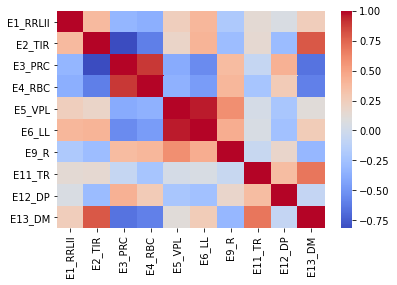

In [5]:
#smaller chart
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

In [6]:
#check which ones are statiscally significant
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

p_values = calculate_pvalues(df_cultivo)



In [7]:
#Plot p-values
def highlight_significant(val):
    '''
    highlight in blue only the statistically significant cells
    '''
    color = 'blue' if val < 0.05 else 'grey'
    return 'color: %s' % color

p_values.style.applymap(highlight_significant)

,E1_RRLII,E2_TIR,E3_PRC,E4_RBC,E5_VPL,E6_LL,E9_R,E11_TR,E12_DP,E13_DM
E1_RRLII,0.000000,0.222900,0.306800,0.237100,0.447200,0.194500,0.557600,0.675800,0.859300,0.435400
E2_TIR,0.222900,0.000000,0.001200,0.039400,0.537800,0.182500,0.377100,0.638400,0.364400,0.001900
E3_PRC,0.306800,0.001200,0.000000,0.000100,0.214500,0.066100,0.237600,0.850400,0.167900,0.022100
E4_RBC,0.237100,0.039400,0.000100,0.000000,0.259000,0.130200,0.200500,0.484600,0.392900,0.042700
E5_VPL,0.447200,0.537800,0.214500,0.259000,0.000000,0.000000,0.042800,0.914900,0.504800,0.713300
E6_LL,0.194500,0.182500,0.066100,0.130200,0.000000,0.000000,0.142600,0.869300,0.429400,0.402100
E9_R,0.557600,0.377100,0.237600,0.200500,0.042800,0.142600,0.000000,0.879500,0.571600,0.315900
E11_TR,0.675800,0.638400,0.850400,0.484600,0.914900,0.869300,0.879500,0.000000,0.247800,0.013400
E12_DP,0.859300,0.364400,0.167900,0.392900,0.504800,0.429400,0.571600,0.247800,0.000000,0.831100
E13_DM,0.435400,0.001900,0.022100,0.042700,0.713300,0.402100,0.315900,0.013400,0.831100,0.000000


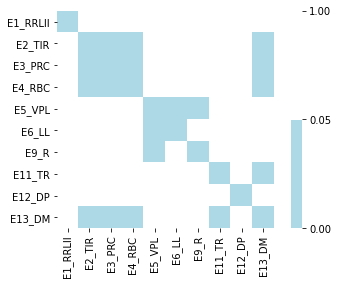

In [8]:
#Smaller plot of p-values
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

np.random.seed(101)
zvals = np.random.rand(100, 100) * 10

# make a color map of fixed colors
cmap_discrete = colors.ListedColormap(['lightblue', 'white'])
bounds=[0,0.05,1]
norm_binary = colors.BoundaryNorm(bounds, cmap_discrete.N)

# tell imshow about color map so that only set colors are used
img = plt.imshow(zvals, interpolation='nearest', origin='lower',
                    cmap=cmap_discrete, norm=norm_binary)

sns.heatmap(p_values, xticklabels=p_values.columns, yticklabels=p_values.columns, cmap=cmap_discrete, norm=norm_binary)

**PCA** 
Now we do the PCA 

In [9]:
#Normalize the data to have MEAN==0
from sklearn.preprocessing import StandardScaler

x = df_cultivo.iloc[:,1:].values
x = StandardScaler().fit_transform(x) # normalizing the features
#print(x)


In [11]:
#Run PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df_cultivo[['cultivo']]], axis = 1)

['Truta - race-way' 'Tilapia - gaiolas - SP -  sem restricao alimentar'
 'Tilapia - gaiolas - SP - com restricao alimentar'
 'Tilapia - gaiola - RS' 'Tambatinga - viveiro 2'
 'Tambatinga - viveiro 23' 'Tambatinga - viveiro 250'
 'Tambaqui - M amazonicum - policultivo - SP' 'Tilapia - tanque rede - RN'
 'Lambari - semi intensivo - baixo controle'
 'Lambari - semi intensivo - médio controle'
 'Lambari - semi intensivo - alto controle']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


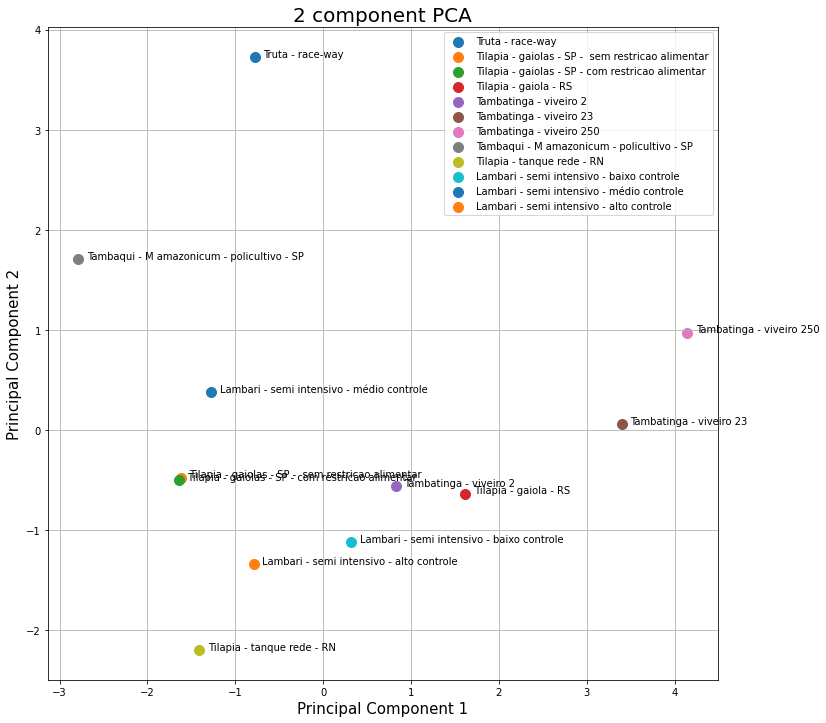

In [13]:
#Visualize results of PCA in Two Dimensions
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()
print(targets)
for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    ax.scatter(x,y,s = 100)
    ax.annotate(target, (x+0.1,y))

#for name in targets:  
    
ax.legend(targets, loc='top right')
ax.grid()

In [14]:
variance_list =pca.explained_variance_ratio_
print("variance explained by each component:", variance_list)
print("total variance explained:", sum(variance_list))


variance explained by each component: [0.41714191 0.22495845]
total variance explained: 0.6421003596886915


In [15]:
#principal components for each indicador
#print(principalComponents)
#print(targets)
df_clustering = pd.DataFrame({'cultivo': targets,  'pc1':list(principalComponents[:,0]), 'pc2': list(principalComponents[:,1])}, columns=['cultivo', 'pc1','pc2'])
#df_clustering

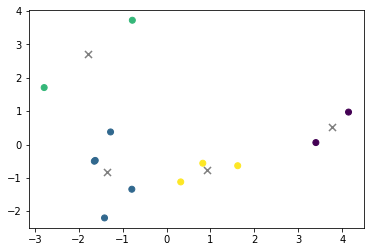

In [32]:
#Find clusters 
from sklearn.cluster import KMeans
#4 clusters
model = KMeans(4)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, marker="x", color="grey"); # Show the 


In [17]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,cluster
5,Tambatinga - viveiro 23,3.398649,0.058140,0
6,Tambatinga - viveiro 250,4.142030,0.972346,0
1,Tilapia - gaiolas - SP - sem restricao alimentar,-1.622970,-0.477475,1
2,Tilapia - gaiolas - SP - com restricao alimentar,-1.643715,-0.501734,1
8,Tilapia - tanque rede - RN,-1.411833,-2.201416,1
10,Lambari - semi intensivo - médio controle,-1.274268,0.376599,1
11,Lambari - semi intensivo - alto controle,-0.790367,-1.341184,1
0,Truta - race-way,-0.778707,3.726350,2
7,Tambaqui - M amazonicum - policultivo - SP,-2.785507,1.707594,2
3,Tilapia - gaiola - RS,1.619379,-0.635899,3


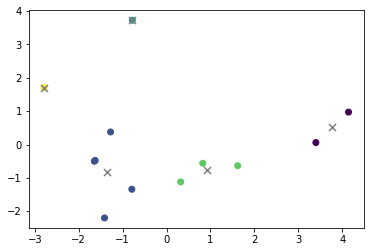

In [31]:
#5 clusters
model = KMeans(5)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, marker="x", color="grey"); # Show the 


In my view, we have two large clusters and three outliers, as the graph above shows.

In [19]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,cluster
1,Tilapia - gaiolas - SP - sem restricao alimentar,-1.622970,-0.477475,0
2,Tilapia - gaiolas - SP - com restricao alimentar,-1.643715,-0.501734,0
8,Tilapia - tanque rede - RN,-1.411833,-2.201416,0
10,Lambari - semi intensivo - médio controle,-1.274268,0.376599,0
11,Lambari - semi intensivo - alto controle,-0.790367,-1.341184,0
5,Tambatinga - viveiro 23,3.398649,0.058140,1
6,Tambatinga - viveiro 250,4.142030,0.972346,1
7,Tambaqui - M amazonicum - policultivo - SP,-2.785507,1.707594,2
3,Tilapia - gaiola - RS,1.619379,-0.635899,3
4,Tambatinga - viveiro 2,0.824927,-0.561561,3


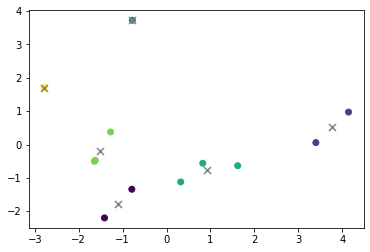

In [33]:
#6 clusters
model = KMeans(6)
model.fit(df_clustering.iloc[:,1:3])
#print(model.cluster_centers_)

#Plot clusters
plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, marker="x", color="grey"); # Show the 


In [21]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,cluster
3,Tilapia - gaiola - RS,1.619379,-0.635899,0
4,Tambatinga - viveiro 2,0.824927,-0.561561,0
9,Lambari - semi intensivo - baixo controle,0.322381,-1.121761,0
7,Tambaqui - M amazonicum - policultivo - SP,-2.785507,1.707594,1
1,Tilapia - gaiolas - SP - sem restricao alimentar,-1.622970,-0.477475,2
2,Tilapia - gaiolas - SP - com restricao alimentar,-1.643715,-0.501734,2
10,Lambari - semi intensivo - médio controle,-1.274268,0.376599,2
5,Tambatinga - viveiro 23,3.398649,0.058140,3
6,Tambatinga - viveiro 250,4.142030,0.972346,3
0,Truta - race-way,-0.778707,3.726350,4


Now we analyze 3 Principal Components


In [22]:
#Normalize the data to have MEAN==0
from sklearn.preprocessing import StandardScaler

x = df_cultivo.iloc[:,1:].values
x = StandardScaler().fit_transform(x) # normalizing the features
#print(x)

In [23]:
#Run PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = pd.concat([principalDf, df_cultivo[['cultivo']]], axis = 1)

In [34]:
variance_list =pca.explained_variance_ratio_
print("variance explained by each component:", variance_list)
print("total variance explained:", sum(variance_list))

variance explained by each component: [0.41714191 0.22495845 0.15992274]
total variance explained: 0.8020230985323334


Now we search for clusters for 3 principal components

In [35]:
#Find clusters 
from sklearn.cluster import KMeans
#4 clusters
model = KMeans(4)
model.fit(df_clustering.iloc[:,1:4])
#print(model.cluster_centers_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
#principal components for each indicador
#print(principalComponents)
#print(targets)
df_clustering = pd.DataFrame({'cultivo': targets,  'pc1':list(principalComponents[:,0]),
                              'pc2': list(principalComponents[:,1]),'pc3': list(principalComponents[:,2])},
                              columns=['cultivo', 'pc1','pc2','pc3'])
#df_clustering

In [ ]:
#4 clusters 
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(df_clustering.iloc[:,1:4])
#print(model.cluster_centers_)

#Plot clusters
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)

ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2], s=150, marker='x', color="black"); # Show the 
    
ax.legend(targets)
ax.grid()

Now we search for clusters for the 3 principal components

In [38]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')


,cultivo,pc1,pc2,pc3,cluster
4,Tambatinga - viveiro 2,0.824927,-0.561561,-0.197224,0
8,Tilapia - tanque rede - RN,-1.411833,-2.201416,-2.030523,0
9,Lambari - semi intensivo - baixo controle,0.322381,-1.121761,-0.160113,0
10,Lambari - semi intensivo - médio controle,-1.274268,0.376599,-1.030073,0
11,Lambari - semi intensivo - alto controle,-0.790367,-1.341184,-0.721947,0
3,Tilapia - gaiola - RS,1.619379,-0.635899,2.137166,1
5,Tambatinga - viveiro 23,3.398649,0.058140,0.750746,1
6,Tambatinga - viveiro 250,4.142030,0.972346,-1.573919,1
0,Truta - race-way,-0.778707,3.726350,0.001344,2
7,Tambaqui - M amazonicum - policultivo - SP,-2.785507,1.707594,-0.508368,2


Comparing k-means of PC12 with PC123, we see that the cluster membership changes completely.

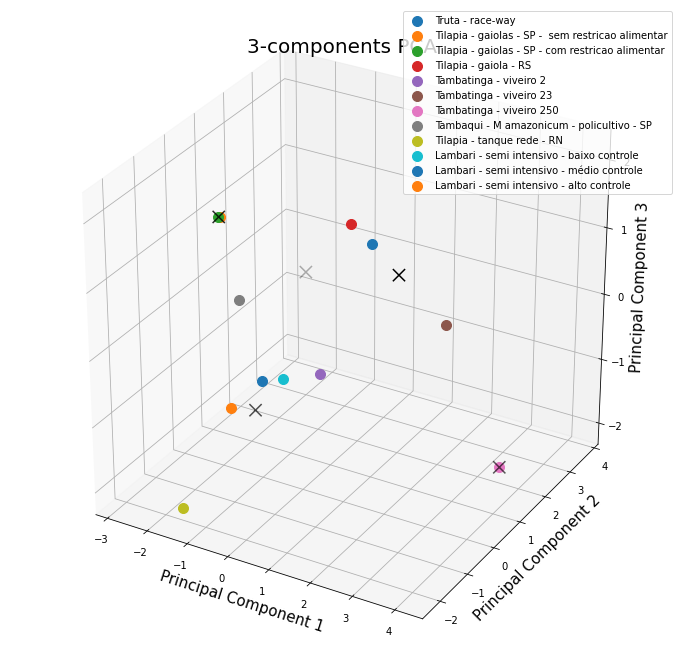

In [39]:
#5 clusters 
from sklearn.cluster import KMeans
model = KMeans(5)
model.fit(df_clustering.iloc[:,1:4])
#print(model.cluster_centers_)

#Plot clusters
#plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
#plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, color="red"); # Show the 

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)
    #ax.annotate(target, (x,y))

ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2], s=150, marker='x', color="black"); # Show the 

#for name in targets:  
    
ax.legend(targets)
ax.grid()

In [40]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,pc3,cluster
0,Truta - race-way,-0.778707,3.726350,0.001344,0
7,Tambaqui - M amazonicum - policultivo - SP,-2.785507,1.707594,-0.508368,0
4,Tambatinga - viveiro 2,0.824927,-0.561561,-0.197224,1
8,Tilapia - tanque rede - RN,-1.411833,-2.201416,-2.030523,1
9,Lambari - semi intensivo - baixo controle,0.322381,-1.121761,-0.160113,1
10,Lambari - semi intensivo - médio controle,-1.274268,0.376599,-1.030073,1
11,Lambari - semi intensivo - alto controle,-0.790367,-1.341184,-0.721947,1
6,Tambatinga - viveiro 250,4.142030,0.972346,-1.573919,2
1,Tilapia - gaiolas - SP - sem restricao alimentar,-1.622970,-0.477475,1.663509,3
2,Tilapia - gaiolas - SP - com restricao alimentar,-1.643715,-0.501734,1.669400,3


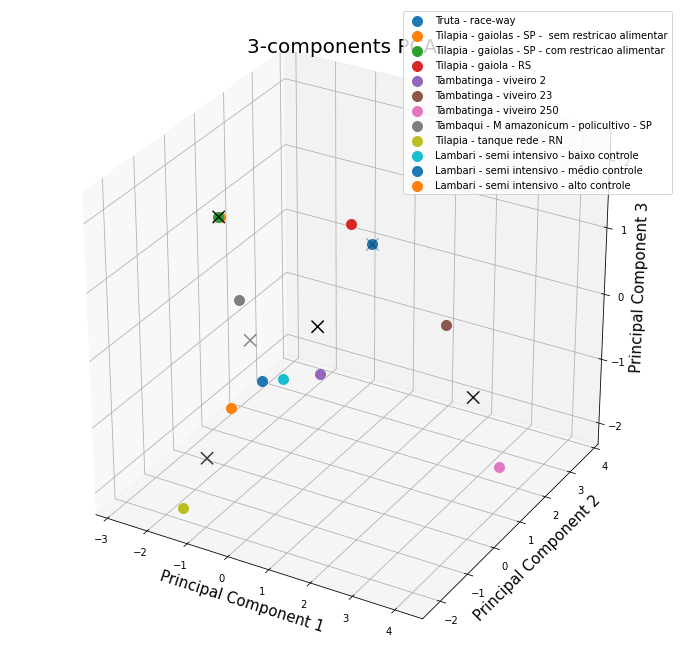

In [41]:
#6 clusters 
from sklearn.cluster import KMeans
model = KMeans(6)
model.fit(df_clustering.iloc[:,1:4])
#print(model.cluster_centers_)

#Plot clusters
#plt.scatter(df_clustering.iloc[:,1],df_clustering.iloc[:,2], c=model.labels_.astype(float));
#plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=50, color="red"); # Show the 

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3-components PCA', fontsize = 20)
targets = df_cultivo['cultivo'].to_numpy()

for target in targets:
    indicesToKeep = finalDf['cultivo'] == target
    x = finalDf.loc[indicesToKeep, 'principal component 1']
    y = finalDf.loc[indicesToKeep, 'principal component 2']
    z = finalDf.loc[indicesToKeep, 'principal component 3']
    ax.scatter(x,y,z,s = 100)
    #ax.annotate(target, (x,y))

ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],model.cluster_centers_[:,2], s=150, marker='x', color="black"); # Show the 

#for name in targets:  
    
ax.legend(targets)
ax.grid()

In [42]:
#To which cluster each point belongs?
df1= df_clustering.assign(cluster=pd.Series(model.labels_).values)
df1.sort_values(by='cluster')

,cultivo,pc1,pc2,pc3,cluster
3,Tilapia - gaiola - RS,1.619379,-0.635899,2.137166,0
4,Tambatinga - viveiro 2,0.824927,-0.561561,-0.197224,0
9,Lambari - semi intensivo - baixo controle,0.322381,-1.121761,-0.160113,0
7,Tambaqui - M amazonicum - policultivo - SP,-2.785507,1.707594,-0.508368,1
10,Lambari - semi intensivo - médio controle,-1.274268,0.376599,-1.030073,1
5,Tambatinga - viveiro 23,3.398649,0.058140,0.750746,2
6,Tambatinga - viveiro 250,4.142030,0.972346,-1.573919,2
0,Truta - race-way,-0.778707,3.726350,0.001344,3
1,Tilapia - gaiolas - SP - sem restricao alimentar,-1.622970,-0.477475,1.663509,4
2,Tilapia - gaiolas - SP - com restricao alimentar,-1.643715,-0.501734,1.669400,4
